In [62]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import random
import tensorflow as tf

In [63]:
# Set the path to the dataset directory
data_dir = "C:/Users/Mohammed Safhi/Desktop/Brain Tumer/Dataset"
# Set the dimensions of the input images
img_width, img_height = 128, 128
# Set the batch size and number of epochs
batch_size = 32
epochs = 30
# Set the random seeds for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
# Load the images and their labels
def load_data():
    images = []
    labels = []
    classes = ['Meningioma', 'Glioma', 'Pituitary_tumor']
    for class_name in classes:
        class_path = os.path.join(data_dir, class_name)
        for img in os.listdir(class_path):
            img_path = os.path.join(class_path, img)
            img = Image.open(img_path)
            img = img.resize((img_width, img_height))
            
            # Convert the image to RGB format and remove the alpha channel
            img = img.convert('RGB')
            
            img = np.array(img)
            images.append(img)
            labels.append(class_name)
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

In [72]:
# Split the data into training, validation, and testing sets
def split_data(images, labels):
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

# Preprocess the labels
def preprocess_labels(y_train, y_val, y_test):
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_val = label_encoder.transform(y_val)
    y_test = label_encoder.transform(y_test)
    num_classes = len(label_encoder.classes_)
    y_train = to_categorical(y_train, num_classes)
    y_val = to_categorical(y_val, num_classes)
    y_test = to_categorical(y_test, num_classes)
    return y_train, y_val, y_test, label_encoder

In [65]:
# Build the CNN model
def build_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [66]:
# Train the model
def train_model(model, X_train, y_train, X_val, y_val):
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_val, y_val))
    return history

# Evaluate the model on the test set
def evaluate_model(model, X_test, y_test):
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print('Test loss:', loss)
    print('Test accuracy:', accuracy)

# Load the data
images, labels = load_data()

# Split the data into training, validation, and testing sets
X_train, X_val, X_test, y_train, y_val, y_test = split_data(images, labels)

# Preprocess the labels
y_train, y_val, y_test, label_encoder = preprocess_labels(y_train, y_val, y_test)

# Build the model
model = build_model()

# Train the model and get the training history
history = train_model(model, X_train, y_train, X_val, y_val)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Get the validation accuracy from the training history
val_accuracy = history.history['val_accuracy']
print('Validation accuracy:', val_accuracy[-1])

Epoch 1/30
62/62 [==============================] - 37s 572ms/step - loss: 7.7612 - accuracy: 0.6526 - val_loss: 0.5429 - val_accuracy: 0.8086
Epoch 2/30
62/62 [==============================] - 32s 518ms/step - loss: 0.4985 - accuracy: 0.7791 - val_loss: 0.3719 - val_accuracy: 0.8595
Epoch 3/30
62/62 [==============================] - 32s 522ms/step - loss: 0.4157 - accuracy: 0.8255 - val_loss: 0.5286 - val_accuracy: 0.7963
Epoch 4/30
62/62 [==============================] - 31s 503ms/step - loss: 0.4004 - accuracy: 0.8362 - val_loss: 0.3432 - val_accuracy: 0.8595
Epoch 5/30
62/62 [==============================] - 31s 504ms/step - loss: 0.2927 - accuracy: 0.8786 - val_loss: 0.3190 - val_accuracy: 0.8717
Epoch 6/30
62/62 [==============================] - 33s 530ms/step - loss: 0.2551 - accuracy: 0.8949 - val_loss: 0.2763 - val_accuracy: 0.8859
Epoch 7/30
62/62 [==============================] - 32s 511ms/step - loss: 0.1912 - accuracy: 0.9230 - val_loss: 0.3772 - val_accuracy: 0.8574

1/1 [==============================] - 4s 4s/step


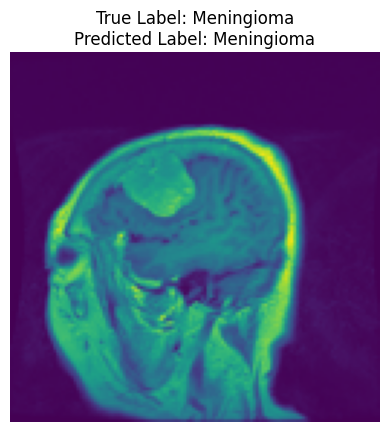

In [67]:
# Select a random sample from the test set
sample_index = np.random.randint(0, len(X_test))
sample_image = X_test[sample_index]
sample_label = y_test[sample_index]

# Reshape the sample image for visualization
sample_image = sample_image.reshape((img_width, img_height, 3))

# Make a prediction on the sample image
prediction = model.predict(np.expand_dims(sample_image, axis=0))
predicted_class_index = np.argmax(prediction)
predicted_class = label_encoder.classes_[predicted_class_index]

# Display the sample image and its prediction
plt.imshow(sample_image)
plt.title(f"True Label: {label_encoder.inverse_transform([np.argmax(sample_label)])[0]}\n"
          f"Predicted Label: {predicted_class}")
plt.axis('off')
plt.show()

In [73]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 14, 14, 128)     